In [77]:
import pandas as pd

In [132]:

station_info = pd.read_csv('C:/Users/ASIA_07/Desktop/Compas 과제/고양시 자전거/고양시자전거data/02.자전거스테이션.csv')

In [187]:
bicycle = pd.read_csv('C:/Users/ASIA_07/Desktop/Compas 과제/고양시 자전거/고양시자전거data/01.운영이력.csv')

#bicycle = read.sample(10000)

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [188]:
bicycle = bicycle[["LEAS_STATION","RTN_STATION"]]     # 대여 -반납 정류소만 뽑았음.

In [189]:
bicycle_leas = pd.DataFrame(bicycle["LEAS_STATION"])    # 대여 정류소만 뽑음
bicycle_rtn = pd.DataFrame(bicycle["RTN_STATION"])       # 반납 정류소만 뽑음.


In [ ]:
# 대여한 정류소들 위치뽑아내기
bicycle_leas['X'] = 0
bicycle_leas['Y'] = 0


for i in range(len(bicycle_leas['LEAS_STATION'])):
    for j in range(len(station_info['Station_ID'])):
        if bicycle_leas['LEAS_STATION'].iloc[i] == station_info['Station_ID'].iloc[j] :
            bicycle_leas['X'].iloc[i] = station_info['위도'].iloc[j]
            bicycle_leas['Y'].iloc[i] = station_info['경도'].iloc[j]
            break


C:\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [137]:
bicycle_leas
bicycle_leas.to_csv('bicycle_leas.csv',mode='w')

In [138]:
# 이번엔 반납한 곳 위치뽑아내기
bicycle_rtn['X'] = 0
bicycle_rtn['Y'] = 0


for i in range(len(bicycle_rtn['RTN_STATION'])):
    for j in range(len(station_info['Station_ID'])):
        if bicycle_rtn['RTN_STATION'].iloc[i] == station_info['Station_ID'].iloc[j] :
            bicycle_rtn['X'].iloc[i] = station_info['위도'].iloc[j]
            bicycle_rtn['Y'].iloc[i] = station_info['경도'].iloc[j]
            break


In [139]:
bicycle_rtn
bicycle_rtn.to_csv('bicycle_rtn.csv',mode='w')

#  bicycle_leas, bicycle_rtn, 02.자전거스테이션(=자전거정류소 전체목록) ---> 이 세 가지 파일을 가지고 qgis에 그려봤음. --> 안 쓰는 정류소는 

 - 향동동 부분 ( 지도의 동남쪽 맨 끝부분) -  6개
 - 주엽동 근처 4개
 - 기타 7개 
 
 - --> 운영이력파일에서 천 개를 뽑았을 때, 위 17개는 대여도 반납도 0건

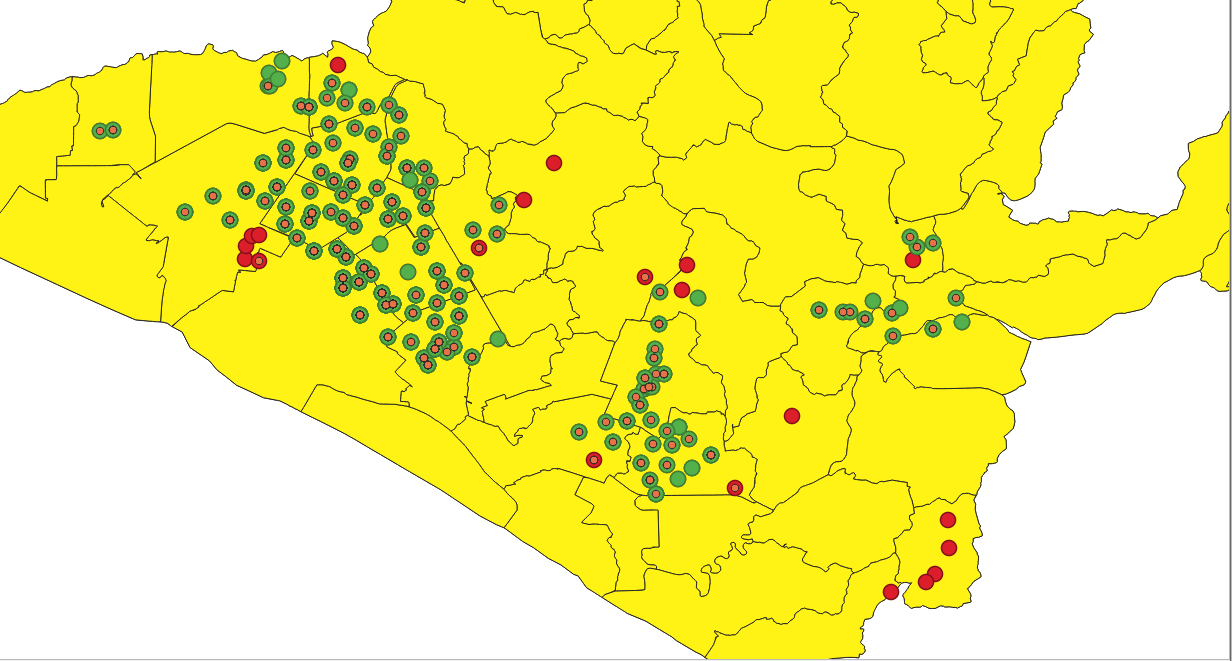

In [118]:
bicycle_leas[bicycle_leas['LEAS_STATION']==343]

,LEAS_STATION,X,Y
3046996,343,37.675036,126.768351
3131306,343,37.675036,126.768351
2457918,343,37.675036,126.768351
177743,343,37.675036,126.768351
604239,343,37.675036,126.768351
2614549,343,37.675036,126.768351
2769570,343,37.675036,126.768351


In [179]:
a_leas = bicycle_leas.groupby(by='LEAS_STATION').count()
b_leas = a_leas.sort_values(by='X',ascending=False)

In [180]:
b_leas.head(10)

,X,Y
LEAS_STATION,,
253,273,273
309,237,237
254,230,230
259,219,219
215,204,204
210,192,192
310,191,191
342,188,188
211,173,173


In [181]:
b_leas.tail(10)

,X,Y
LEAS_STATION,,
178,8,8
216,7,7
139,6,6
105,5,5
146,3,3
351,3,3
265,3,3
264,2,2
263,2,2


In [182]:
del b_leas['X']
b_leas = b_leas.rename(columns = {"Y":"정류장 이용 건수"})

In [183]:
b_leas

,정류장 이용 건수
LEAS_STATION,
253,273
309,237
254,230
259,219
215,204
...,...
351,3
265,3
264,2


In [184]:
#RTN으로 파일만들기
a_rtn = bicycle_rtn.groupby(by='RTN_STATION').count()
b_rtn = a_rtn.sort_values(by='X',ascending=False)
del b_rtn['X']
b_rtn = b_rtn.rename(columns = {"Y":"정류장 이용 건수"})

In [186]:
b_rtn

,정류장 이용 건수
RTN_STATION,
0,1285
253,272
259,255
254,253
309,245
...,...
106,4
265,4
351,3
